
## STANDARD PROBLEM 5

In [121]:
print("Especificaciones del problema 5")

Especificaciones del problema 5


![Esto es una imagen](std5.png)

In [9]:
import subprocess

# Ejecutar la simulación
subprocess.run(["mumax3", "sp5.mx3"])

CompletedProcess(args=['mumax3', 'sp5.mx3'], returncode=1)

In [2]:
import subprocess
result = subprocess.run(["mumax3", "-v"], capture_output=True, text=True)
print(result.stdout)
print(result.stderr)

//mumax 3.11.1 [windows_amd64 go1.22.4(gc) CUDA-12.9]
//commit hash: ee077035
//CPU info: AMD Ryzen 7 5700G with Radeon Graphics, Cores: 16, 3801 MHz
//GPU info: NVIDIA GeForce RTX 4060(8187MB), CUDA Driver 12.9, cc=8.9, using cc=75 PTX
//OS  info: Windows OS, Hostname: DESKTOP-HEB070L
//Timestamp: 2025-08-06 05:52:29
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//




In [3]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  # <-- reemplaza esto por tu ruta exacta
archivo = "sp5.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

print("STDOUT:\n", result.stdout)
print("\nSTDERR:\n", result.stderr)


STDOUT:
 //mumax 3.11.1 [windows_amd64 go1.22.4(gc) CUDA-12.9]
//commit hash: ee077035
//CPU info: AMD Ryzen 7 5700G with Radeon Graphics, Cores: 16, 3801 MHz
//GPU info: NVIDIA GeForce RTX 4060(8187MB), CUDA Driver 12.9, cc=8.9, using cc=75 PTX
//OS  info: Windows OS, Hostname: DESKTOP-HEB070L
//Timestamp: 2025-08-06 06:53:31
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: sp5.out/


STDERR:
 C:/Users/jromaes/go/src/github.com/mumax/3/cmd/mumax3/main.go:114 script line 4:68: illegal UTF-8 encoding (and 9 more errors): 



In [5]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 6.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 5.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.6 MB/s  0:00:01
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 4.7 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 4.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 4.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.2 MB/s  0:00:01
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ----------------------- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### STANDARD PROBLEM 5 con torque no adiabático ξ = 0.05

In [3]:
# Crear archivo sp5_xi050.mx3 
filename = "sp5_xi050.mx3"
xi = 0.05

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)
autosave(m_full, 1e-10)
autosave(E_total, 1e-10)

Run(1e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi050.mx3 creado.


In [4]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  # ← CAMBIA ESTA RUTA AL DE DONDE SE JECUTE EN LA PC
archivo = "sp5_xi050.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

✅ Simulación completada desde Jupyter.


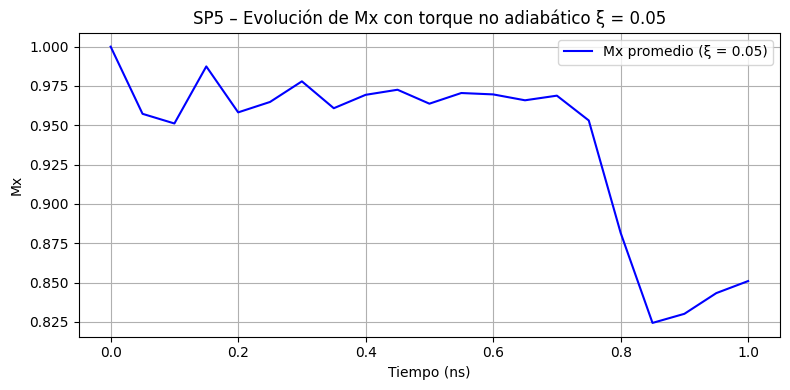

,t (s),mx (),my (),mz (),m_fullx (A/m),m_fully (A/m),m_fullz (A/m),E_total (J)
0,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,800000.00,0.000000,0.000000,3.870370e-18
1,5.002933e-11,0.957277,8.905772e-09,-3.747118e-09,765821.80,0.007111,-0.003006,3.768910e-18
2,1.000011e-10,0.951138,3.263813e-08,-8.323695e-09,760910.06,0.025995,-0.006775,3.717147e-18
3,1.500345e-10,0.987423,1.121080e-07,-2.839806e-08,789938.75,0.089600,-0.022705,3.671130e-18
4,2.000220e-10,0.958205,4.614994e-07,-8.490451e-08,766564.40,0.369186,-0.067913,3.651577e-18


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo, ignorando el caracter '#' inicial del encabezado
df = pd.read_csv(
    r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi050.out\table.txt",
    delimiter="\t",
    comment="#",
    header=None,
    skiprows=1
)

# Asignar nombres manuales a las columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mx = df["mx ()"]

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mx, label="Mx promedio (ξ = 0.05)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx con torque no adiabático ξ = 0.05")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
df.head()

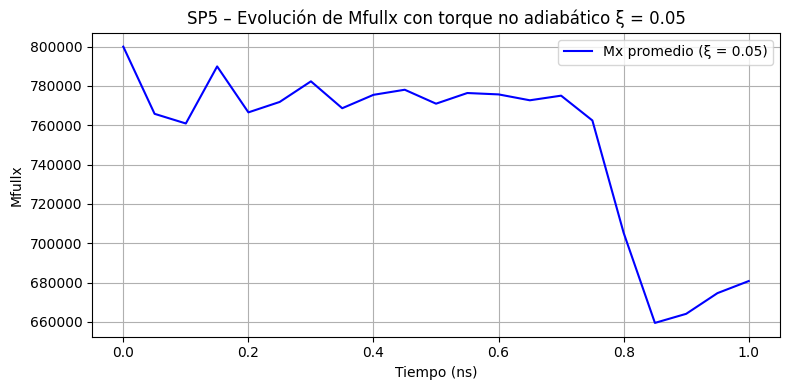

In [9]:
#df.columns = [
    #"t (s)", "mx ()", "my ()", "mz ()",
    #"m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"]#
# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mfullx = df["m_fullx (A/m)"]
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mfullx, label="Mx promedio (ξ = 0.05)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mfullx")
plt.title("SP5 – Evolución de Mfullx (A/m) con torque no adiabático ξ = 0.05")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### STANDARD PROBLEM 5 con torque no adiabático ξ = 0.1

In [11]:
# Crear archivo sp5_xi100.mx3 correctamente configurado
filename = "sp5_xi100.mx3"
xi = 0.1

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)
autosave(m_full, 1e-10)
autosave(E_total, 1e-10)

Run(1e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi100.mx3 creado.


In [14]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  # ← CAMBIA ESTA RUTA AL DE DONDE SE JECUTE EN LA PC
archivo = "sp5_xi100.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

✅ Simulación completada desde Jupyter.


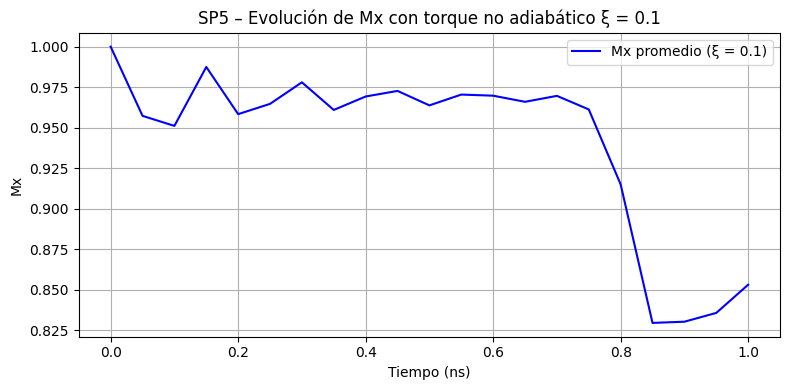

,t (s),mx (),my (),mz (),m_fullx (A/m),m_fully (A/m),m_fullz (A/m),E_total (J)
0,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,800000.00,0.000000,0.000000,3.870370e-18
1,5.002929e-11,0.957261,8.381903e-09,-8.731149e-10,765808.75,0.006714,-0.000732,3.769225e-18
2,1.000010e-10,0.951079,1.482113e-08,-2.502929e-09,760863.20,0.011711,-0.002014,3.717422e-18
3,1.500345e-10,0.987446,5.937181e-08,-1.629087e-08,789956.60,0.047455,-0.013039,3.670830e-18
4,2.000220e-10,0.958331,2.526503e-07,-4.686262e-08,766664.80,0.202057,-0.037510,3.651736e-18


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo, ignorando el caracter '#' inicial del encabezado
df = pd.read_csv(
    r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi100.out\table.txt",
    delimiter="\t",
    comment="#",
    header=None,
    skiprows=1
)

# Asignar nombres manuales a las columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mx = df["mx ()"]

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mx, label="Mx promedio (ξ = 0.1)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx con torque no adiabático ξ = 0.1")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
df.head()

### STANDARD PROBLEM 5 con torque no adiabático ξ = 0.5

In [12]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi500.mx3"
xi = 0.5

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)
autosave(m_full, 1e-10)
autosave(E_total, 1e-10)

Run(1e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi500.mx3 creado.


In [18]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi500.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

✅ Simulación completada desde Jupyter.


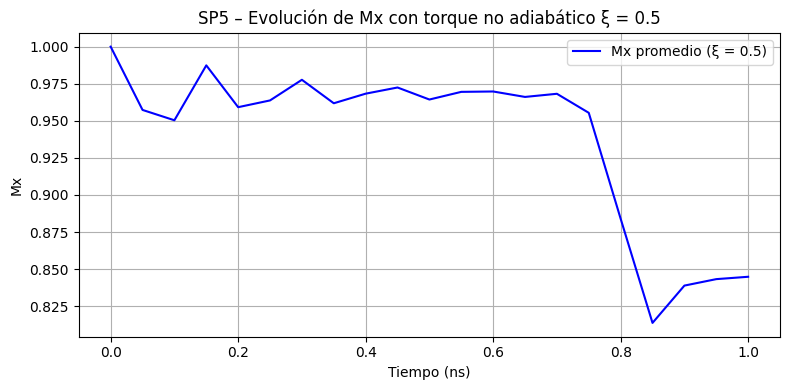

,t (s),mx (),my (),mz (),m_fullx (A/m),m_fully (A/m),m_fullz (A/m),E_total (J)
0,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,800000.00,0.000000,0.000000,3.870370e-18
1,5.002929e-11,0.957332,1.024455e-08,-2.706656e-09,765865.44,0.008148,-0.002123,3.770203e-18
2,1.000018e-10,0.950364,2.945308e-08,-8.498319e-09,760291.00,0.023743,-0.006836,3.717959e-18
3,1.500344e-10,0.987378,1.124281e-07,-2.891466e-08,789902.00,0.089920,-0.023125,3.667395e-18
4,2.000218e-10,0.959188,4.464528e-07,-9.182259e-08,767350.10,0.357086,-0.073448,3.650559e-18


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo, ignorando el caracter '#' inicial del encabezado
df = pd.read_csv(
    r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi500.out\table.txt",
    delimiter="\t",
    comment="#",
    header=None,
    skiprows=1
)

# Asignar nombres manuales a las columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mx = df["mx ()"]

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mx, label="Mx promedio (ξ = 0.5)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx con torque no adiabático ξ = 0.5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
df.head()

### STANDARD PROBLEM 5 con torque no adiabático ξ = 0


In [13]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi000.mx3"
xi = 0

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)
autosave(m_full, 1e-10)
autosave(E_total, 1e-10)

Run(1e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi000.mx3 creado.


In [20]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi000.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

✅ Simulación completada desde Jupyter.


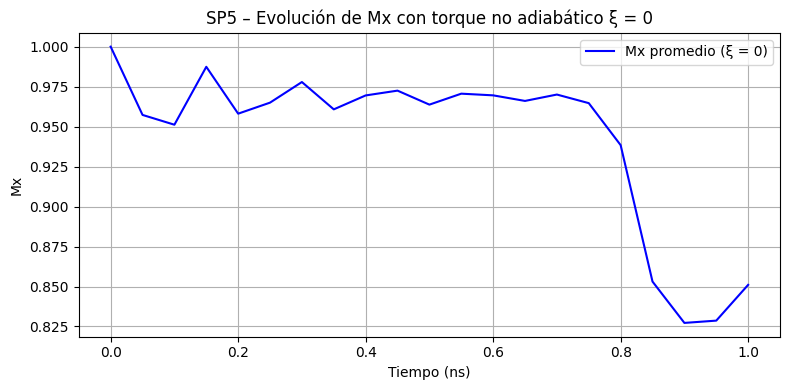

,t (s),mx (),my (),mz (),m_fullx (A/m),m_fully (A/m),m_fullz (A/m),E_total (J)
0,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,800000.00,0.000000,0.000000,3.870370e-18
1,5.002921e-11,0.957300,6.286427e-09,-4.220055e-10,765839.90,0.005005,-0.000366,3.768572e-18
2,1.000007e-10,0.951179,1.966691e-08,-6.868504e-09,760943.06,0.015766,-0.005554,3.716856e-18
3,1.500343e-10,0.987393,8.230563e-08,-2.187153e-08,789914.50,0.065765,-0.017494,3.671356e-18
4,2.000219e-10,0.958087,3.102468e-07,-5.863149e-08,766469.75,0.248093,-0.046889,3.651338e-18


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo, ignorando el caracter '#' inicial del encabezado
df = pd.read_csv(
    r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi000.out\table.txt",
    delimiter="\t",
    comment="#",
    header=None,
    skiprows=1
)

# Asignar nombres manuales a las columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mx = df["mx ()"]

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mx, label="Mx promedio (ξ = 0)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx con torque no adiabático ξ = 0")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
df.head()

### COMPARANDO  evolución de Mx (magnetización promedio en x) durante 1 ns para cada caso.

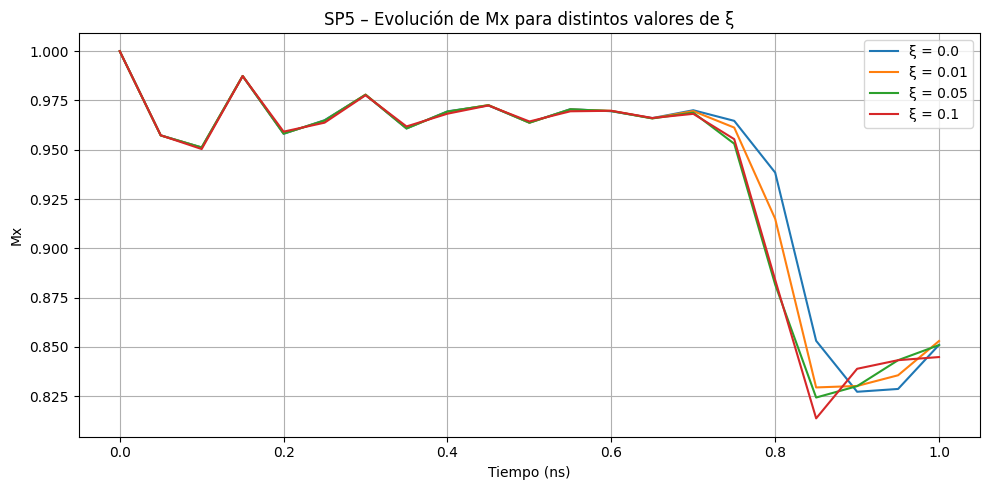

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con nombres de carpeta y valores de xi
casos = {
    "ξ = 0.0":  r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi000.out\table.txt",
    "ξ = 0.01": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi100.out\table.txt",
    "ξ = 0.05": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi050.out\table.txt",
    "ξ = 0.1":  r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi500.out\table.txt"
}

plt.figure(figsize=(10, 5))

for label, filepath in casos.items():
    df = pd.read_csv(filepath, delimiter="\t", comment="#", header=None, skiprows=1)
    df.columns = [
        "t (s)", "mx ()", "my ()", "mz ()",
        "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
    ]
    t_ns = df["t (s)"] * 1e9
    mx = df["mx ()"]
    plt.plot(t_ns, mx, label=label)

plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx para distintos valores de ξ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### My/Ms vs 𝑀𝑥/𝑀𝑠 para ξ = 0.05




0     1.000000
1     0.957277
2     0.951138
3     0.987423
4     0.958205
5     0.964827
6     0.977936
7     0.960841
8     0.969362
9     0.972593
10    0.963729
11    0.970508
12    0.969632
13    0.965887
14    0.968831
15    0.953061
16    0.881598
17    0.824314
18    0.830092
19    0.843258
20    0.850927
21    0.850927
Name: mx (), dtype: float64
0     0.000000e+00
1     8.905772e-09
2     3.263813e-08
3     1.121080e-07
4     4.614994e-07
5     1.114688e-06
6     3.267778e-06
7     1.138792e-05
8     2.948837e-05
9     9.544999e-05
10    3.099283e-04
11    8.680443e-04
12    2.898904e-03
13    9.056507e-03
14    2.695191e-02
15    8.548894e-02
16    1.917070e-01
17    1.663206e-01
18   -3.975373e-02
19   -8.354671e-02
20    2.064368e-02
21    2.064368e-02
Name: my (), dtype: float64
          t (s)     mx ()         my ()         mz ()  m_fullx (A/m)  \
0  0.000000e+00  1.000000  0.000000e+00  0.000000e+00      800000.00   
1  5.002933e-11  0.957277  8.905772e-09 -3.747118e-0

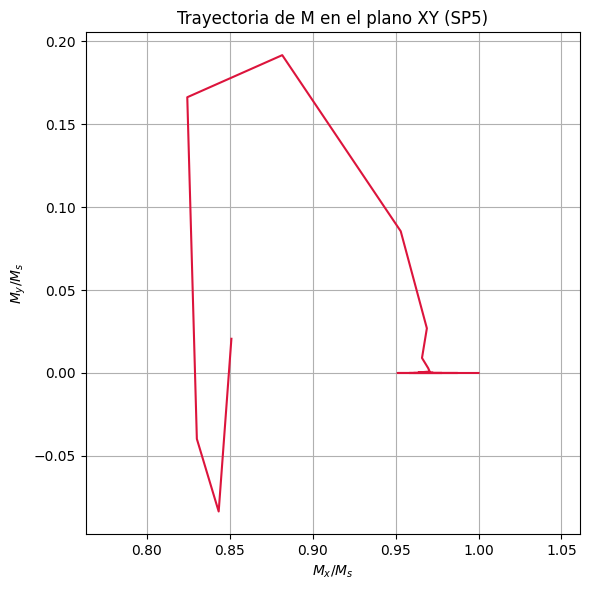

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Cambia esta ruta al archivo correspondiente (por ejemplo, ξ = 0.05)
ruta = r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi050.out\table.txt"

# Leer archivo
df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)

# Asignar nombres de columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Extraer Mx/Ms y My/Ms
mx = df["mx ()"]
my = df["my ()"]
print(mx)
print(my)
print(df.head())
print(f"\nNúmero total de filas: {len(df)}")
print(f"\nNúmero total de filas: {len(df)}")
# Graficar trayectoria en el plano XY
plt.figure(figsize=(6, 6))
plt.plot(mx, my, color="crimson")
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectoria de M en el plano XY (SP5)")
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


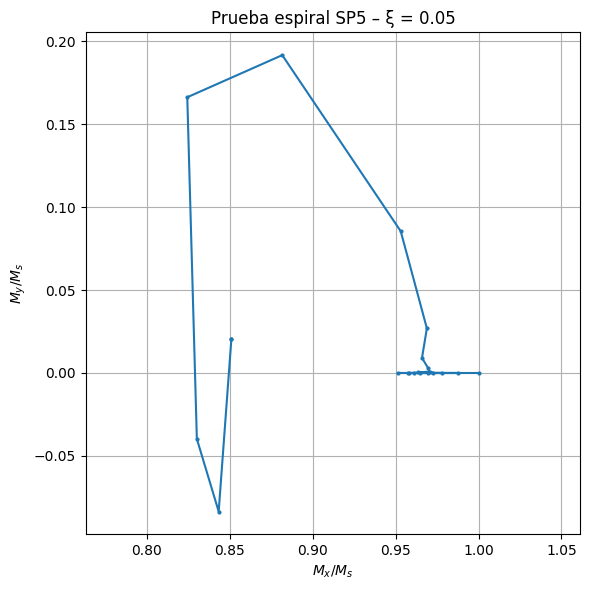

In [33]:
import matplotlib.pyplot as plt

mx = df["mx ()"]
my = df["my ()"]

plt.figure(figsize=(6, 6))
plt.plot(mx, my, '-o', markersize=2)
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Prueba espiral SP5 – ξ = 0.05")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

### no vemos la espiral porque tenemos pocos datos El paper genera la espiral para una evolución larga osea varios nanosegundos, con muchos puntos de guardado, crearemos para un tiempo mayor 5ns con intervalos de 0.05 casos = {
  ####  "ξ = 0.0":  r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi000.out\table.txt",
  #### "ξ = 0.1": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi100.out\table.txt",
  #### "ξ = 0.05": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi050.out\table.txt",
  #### "ξ = 0.5":  r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi500.out\table.txt"


In [41]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi0002.mx3"
xi = 0

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)

Run(5e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi0002.mx3 creado.


In [47]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi0502.mx3"
xi = 0.05

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)

Run(5e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi0502.mx3 creado.


In [48]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi5002.mx3"
xi = 0.5

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)

Run(5e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi5002.mx3 creado.


In [49]:
# Crear archivo sp5_xi050.mx3 correctamente configurado
filename = "sp5_xi1002.mx3"
xi = 0.1

mx3_code = f"""SetGridsize(128, 128, 1)
SetCellsize(0.78125e-9, 0.78125e-9, 10e-9)

Msat = 8e5
Aex = 1.3e-11
alpha = 0.1

Pol = 1.0
J = vector(1e12, 0, 0)
xi = {xi}

m = uniform(1, 0, 0)

TableAdd(m_full)
TableAdd(E_total)

tableautosave(5e-11)     // 🔁 guardar datos cada 0.05 ns

autosave(m, 1e-10)

Run(5e-9)
TableSave()
"""

with open(filename, "w", encoding="utf-8") as f:
    f.write(mx3_code)

print(f"✅ Archivo {filename} creado.")

✅ Archivo sp5_xi1002.mx3 creado.


In [42]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi0002.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

✅ Simulación completada desde Jupyter.


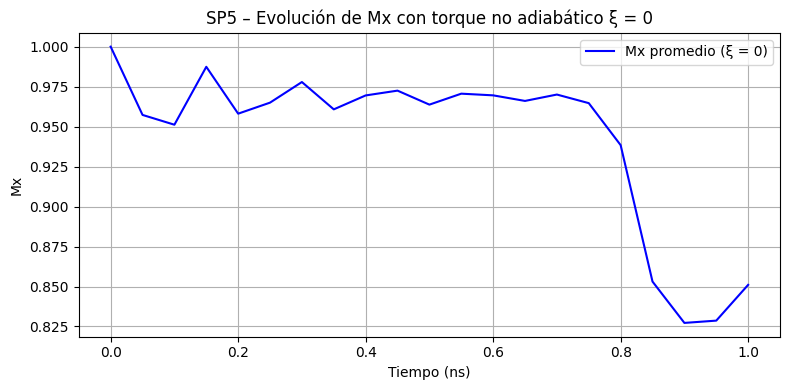

,t (s),mx (),my (),mz (),m_fullx (A/m),m_fully (A/m),m_fullz (A/m),E_total (J)
0,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,800000.00,0.000000,0.000000,3.870370e-18
1,5.002921e-11,0.957300,6.286427e-09,-4.220055e-10,765839.90,0.005005,-0.000366,3.768572e-18
2,1.000007e-10,0.951179,1.966691e-08,-6.868504e-09,760943.06,0.015766,-0.005554,3.716856e-18
3,1.500343e-10,0.987393,8.230563e-08,-2.187153e-08,789914.50,0.065765,-0.017494,3.671356e-18
4,2.000219e-10,0.958087,3.102468e-07,-5.863149e-08,766469.75,0.248093,-0.046889,3.651338e-18


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo, ignorando el caracter '#' inicial del encabezado
df = pd.read_csv(
    r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi0002.out\table.txt",
    delimiter="\t",
    comment="#",
    header=None,
    skiprows=1
)

# Asignar nombres manuales a las columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Convertir tiempo a nanosegundos
t_ns = df["t (s)"] * 1e9
Mx = df["mx ()"]

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_ns, Mx, label="Mx promedio (ξ = 0)", color="blue")
plt.xlabel("Tiempo (ns)")
plt.ylabel("Mx")
plt.title("SP5 – Evolución de Mx con torque no adiabático ξ = 0")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
df.head()

0      1.000000
1      0.957300
2      0.951179
3      0.987393
4      0.958087
         ...   
96     0.844634
97     0.844634
98     0.844634
99     0.844634
100    0.844634
Name: mx (), Length: 101, dtype: float64
0      0.000000e+00
1      6.286427e-09
2      1.967055e-08
3      8.230563e-08
4      3.102468e-07
           ...     
96     9.487849e-09
97     9.778887e-09
98     6.693881e-10
99     8.731149e-10
100    1.318404e-08
Name: my (), Length: 101, dtype: float64
          t (s)     mx ()         my ()         mz ()  m_fullx (A/m)  \
0  0.000000e+00  1.000000  0.000000e+00  0.000000e+00      800000.00   
1  5.002921e-11  0.957300  6.286427e-09 -4.220055e-10      765839.90   
2  1.000007e-10  0.951179  1.967055e-08 -6.868504e-09      760943.06   
3  1.500343e-10  0.987393  8.230563e-08 -2.187153e-08      789914.50   
4  2.000219e-10  0.958087  3.102468e-07 -5.863194e-08      766469.75   

   m_fully (A/m)  m_fullz (A/m)   E_total (J)  
0       0.000000       0.000000  3.870370

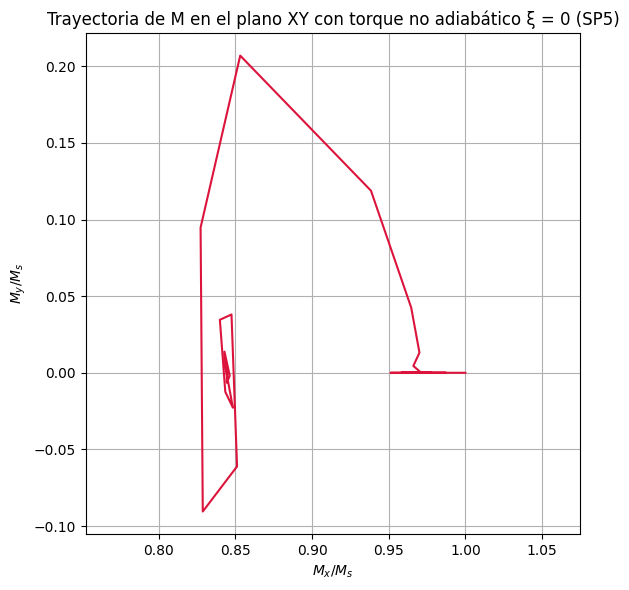

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Cambia esta ruta al archivo correspondiente (por ejemplo, ξ = 0.05)
ruta = r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi0002.out\table.txt"

# Leer archivo
df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)

# Asignar nombres de columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Extraer Mx/Ms y My/Ms
mx = df["mx ()"]
my = df["my ()"]
print(mx)
print(my)
print(df.head())
print(f"\nNúmero total de filas: {len(df)}")

# Graficar trayectoria en el plano XY
plt.figure(figsize=(6, 6))
plt.plot(mx, my, color="crimson")
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectoria de M en el plano XY con torque no adiabático ξ = 0 (SP5)")
plt.axis("equal")
plt.grid(True)
plt.tight_layout()

✅ Simulación completada desde Jupyter.
0      1.000000
1      0.957277
2      0.951138
3      0.987423
4      0.958205
         ...   
96     0.844628
97     0.844628
98     0.844628
99     0.844628
100    0.844628
Name: mx (), Length: 101, dtype: float64
0      0.000000e+00
1      8.905772e-09
2      3.263631e-08
3      1.121080e-07
4      4.614994e-07
           ...     
96     7.457160e-03
97     7.457165e-03
98     7.457153e-03
99     7.457145e-03
100    7.457141e-03
Name: my (), Length: 101, dtype: float64
          t (s)     mx ()         my ()         mz ()  m_fullx (A/m)  \
0  0.000000e+00  1.000000  0.000000e+00  0.000000e+00      800000.00   
1  5.002933e-11  0.957277  8.905772e-09 -3.747118e-09      765821.75   
2  1.000011e-10  0.951138  3.263631e-08 -8.323695e-09      760910.06   
3  1.500345e-10  0.987423  1.121080e-07 -2.839806e-08      789938.60   
4  2.000220e-10  0.958205  4.614994e-07 -8.490406e-08      766564.30   

   m_fully (A/m)  m_fullz (A/m)   E_total (J)  
0 

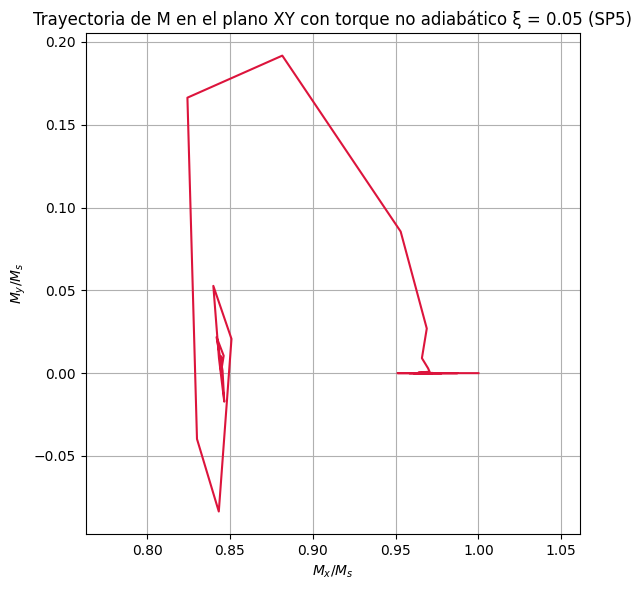

In [50]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi0502.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

import pandas as pd
import matplotlib.pyplot as plt

# Cambia esta ruta al archivo correspondiente (por ejemplo, ξ = 0.05)
ruta = r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi0502.out\table.txt"

# Leer archivo
df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)

# Asignar nombres de columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Extraer Mx/Ms y My/Ms
mx = df["mx ()"]
my = df["my ()"]
print(mx)
print(my)
print(df.head())
print(f"\nNúmero total de filas: {len(df)}")

# Graficar trayectoria en el plano XY
plt.figure(figsize=(6, 6))
plt.plot(mx, my, color="crimson")
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectoria de M en el plano XY con torque no adiabático ξ = 0.05 (SP5)")
plt.axis("equal")
plt.grid(True)
plt.tight_layout()

✅ Simulación completada desde Jupyter.
0      1.000000
1      0.957261
2      0.951079
3      0.987446
4      0.958331
         ...   
96     0.844612
97     0.844612
98     0.844612
99     0.844612
100    0.844612
Name: mx (), Length: 101, dtype: float64
0      0.000000e+00
1      8.381903e-09
2      1.482113e-08
3      5.937181e-08
4      2.527086e-07
           ...     
96     1.480441e-02
97     1.480441e-02
98     1.480440e-02
99     1.480440e-02
100    1.480441e-02
Name: my (), Length: 101, dtype: float64
          t (s)     mx ()         my ()         mz ()  m_fullx (A/m)  \
0  0.000000e+00  1.000000  0.000000e+00  0.000000e+00      800000.00   
1  5.002929e-11  0.957261  8.381903e-09 -8.731149e-10      765808.75   
2  1.000010e-10  0.951079  1.482113e-08 -2.502929e-09      760863.20   
3  1.500345e-10  0.987446  5.937181e-08 -1.629087e-08      789956.60   
4  2.000220e-10  0.958331  2.527086e-07 -4.686262e-08      766664.80   

   m_fully (A/m)  m_fullz (A/m)   E_total (J)  
0 

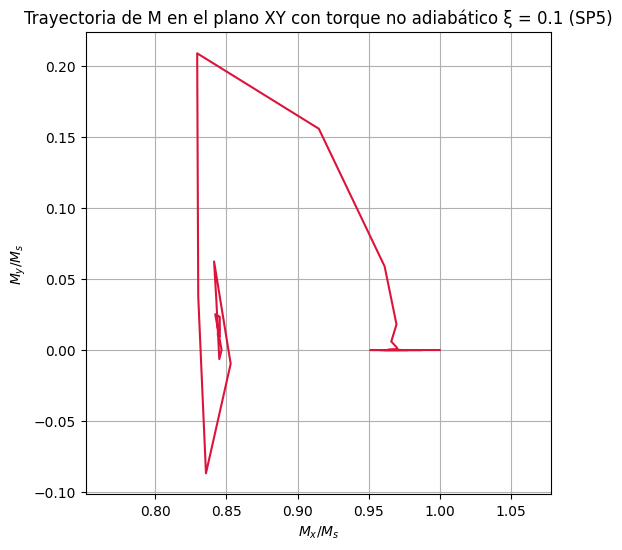

In [51]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi1002.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

import pandas as pd
import matplotlib.pyplot as plt

# Cambia esta ruta al archivo correspondiente (por ejemplo, ξ = 0.05)
ruta = r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi1002.out\table.txt"

# Leer archivo
df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)

# Asignar nombres de columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Extraer Mx/Ms y My/Ms
mx = df["mx ()"]
my = df["my ()"]
print(mx)
print(my)
print(df.head())
print(f"\nNúmero total de filas: {len(df)}")

# Graficar trayectoria en el plano XY
plt.figure(figsize=(6, 6))
plt.plot(mx, my, color="crimson")
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectoria de M en el plano XY con torque no adiabático ξ = 0.1 (SP5)")
plt.axis("equal")
plt.grid(True)

✅ Simulación completada desde Jupyter.
0      1.000000
1      0.957332
2      0.950364
3      0.987378
4      0.959188
         ...   
96     0.844288
97     0.844288
98     0.844288
99     0.844288
100    0.844288
Name: mx (), Length: 101, dtype: float64
0      0.000000e+00
1      1.024455e-08
2      2.945308e-08
3      1.124281e-07
4      4.464528e-07
           ...     
96     5.988048e-02
97     5.988048e-02
98     5.988048e-02
99     5.988047e-02
100    5.988049e-02
Name: my (), Length: 101, dtype: float64
          t (s)     mx ()         my ()         mz ()  m_fullx (A/m)  \
0  0.000000e+00  1.000000  0.000000e+00  0.000000e+00      800000.00   
1  5.002929e-11  0.957332  1.024455e-08 -2.706656e-09      765865.44   
2  1.000018e-10  0.950364  2.945308e-08 -8.498319e-09      760291.00   
3  1.500344e-10  0.987378  1.124281e-07 -2.891829e-08      789902.00   
4  2.000218e-10  0.959188  4.464528e-07 -9.182259e-08      767350.10   

   m_fully (A/m)  m_fullz (A/m)   E_total (J)  
0 

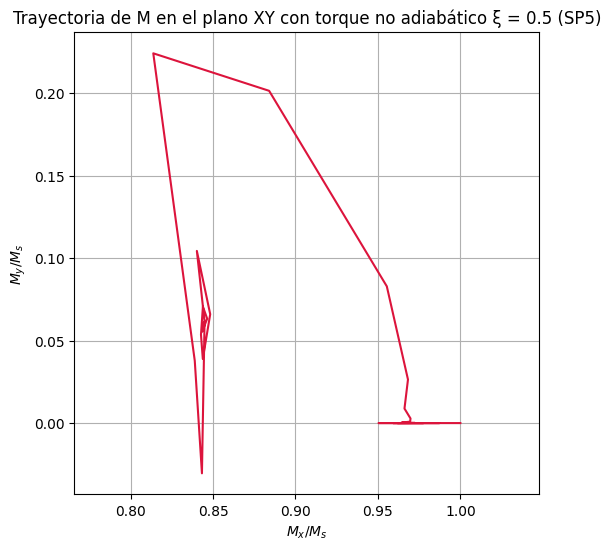

In [52]:
import subprocess

ruta_mumax = r"C:\mumax3\mumax3.exe"  
archivo = "sp5_xi5002.mx3"

result = subprocess.run([ruta_mumax, archivo], capture_output=True, text=True)

# Mostrar resultados de ejecución
if result.returncode == 0:
    print("✅ Simulación completada desde Jupyter.")
else:
    print("❌ Error al ejecutar MuMax3:")
    print(result.stderr)

import pandas as pd
import matplotlib.pyplot as plt

# Cambia esta ruta al archivo correspondiente (por ejemplo, ξ = 0.05)
ruta = r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi5002.out\table.txt"

# Leer archivo
df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)

# Asignar nombres de columnas
df.columns = [
    "t (s)", "mx ()", "my ()", "mz ()",
    "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
]

# Extraer Mx/Ms y My/Ms
mx = df["mx ()"]
my = df["my ()"]
print(mx)
print(my)
print(df.head())
print(f"\nNúmero total de filas: {len(df)}")

# Graficar trayectoria en el plano XY
plt.figure(figsize=(6, 6))
plt.plot(mx, my, color="crimson")
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectoria de M en el plano XY con torque no adiabático ξ = 0.5 (SP5)")
plt.axis("equal")
plt.grid(True)

### COMPARANDO DISTINTAS TRAYECTORIAS

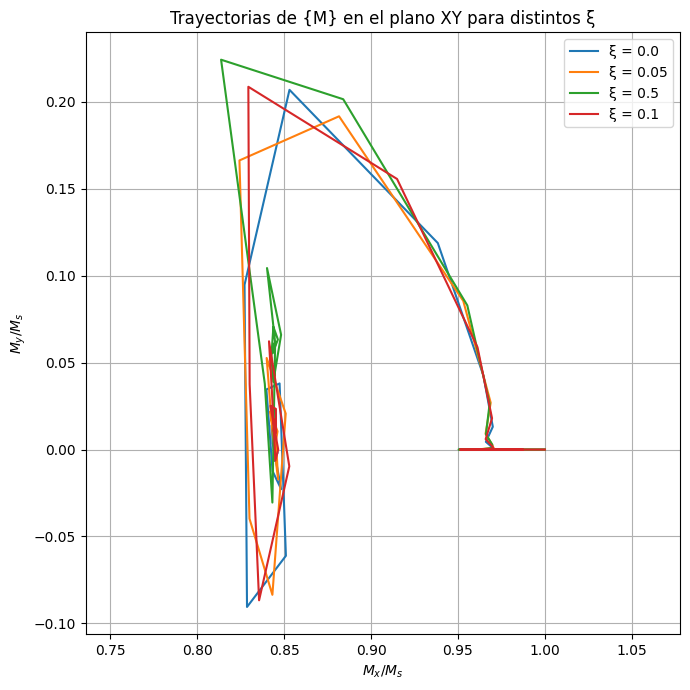

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con etiquetas y rutas de los resultados
casos = {
    "ξ = 0.0":  r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi0002.out\table.txt",
    "ξ = 0.05": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi0502.out\table.txt",
    "ξ = 0.5": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi5002.out\table.txt",
    "ξ = 0.1": r"C:\Users\EDSONVP\Desktop\test jupyter\sp5_xi1002.out\table.txt"
}

# Crear figura
plt.figure(figsize=(7, 7))

# Leer y graficar cada trayectoria
for etiqueta, ruta in casos.items():
    df = pd.read_csv(ruta, delimiter="\t", comment="#", header=None, skiprows=1)
    df.columns = [
        "t (s)", "mx ()", "my ()", "mz ()",
        "m_fullx (A/m)", "m_fully (A/m)", "m_fullz (A/m)", "E_total (J)"
    ]
    mx = df["mx ()"]
    my = df["my ()"]
    plt.plot(mx, my, label=etiqueta)

# Personalización del gráfico
plt.xlabel(r"$M_x / M_s$")
plt.ylabel(r"$M_y / M_s$")
plt.title("Trayectorias de {M} en el plano XY para distintos ξ")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### CREANDO EL MyST

In [124]:
import sys
!"{sys.executable}" -m pip install -U jupyter-book

Defaulting to user installation because normal site-packages is not writeable


In [125]:
import sys
print(sys.executable)


C:\Program Files\Python313\python.exe


In [126]:
!"{sys.executable}" -m pip install -U jupyter-book


Defaulting to user installation because normal site-packages is not writeable


In [127]:
import subprocess
import sys

subprocess.run([sys.executable, "-m", "pip", "install", "-U", "jupyter-book"])
subprocess.run([sys.executable, "-m", "jupyter_book.commands", "create", "mi_web_con_notebook"])

CompletedProcess(args=['C:\\Program Files\\Python313\\python.exe', '-m', 'jupyter_book.commands', 'create', 'mi_web_con_notebook'], returncode=1)

In [129]:
!"{sys.executable}" -m pip show jupyter-book

Name: jupyter-book
Version: 1.0.4.post1
Summary: 
Home-page: https://executablebooks.org/
Author: 
Author-email: Executable Book Project <executablebooks@gmail.com>
License: BSD 3-Clause License

Copyright (c) 2021, Executable Book Project
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONT

In [131]:
import os
from pathlib import Path

# Carpetas donde pip --user instala ejecutables en Windows
posibles_rutas = [
    Path.home() / "AppData/Roaming/Python/Python313/Scripts",
    Path.home() / "AppData/Local/Programs/Python/Python313/Scripts",
    Path.home() / "AppData/Local/Programs/Python/Python311/Scripts",
    Path("C:/Program Files/Python313/Scripts"),
]

# Buscar jupyter-book.exe
encontrado = None
for ruta in posibles_rutas:
    exe = ruta / "jupyter-book.exe"
    if exe.exists():
        encontrado = exe
        break

if encontrado:
    print(f"✅ Encontrado:\n{encontrado}")
else:
    print("❌ No se encontró jupyter-book.exe en las rutas conocidas.")

✅ Encontrado:
C:\Users\EDSONVP\AppData\Roaming\Python\Python313\Scripts\jupyter-book.exe


In [132]:
import subprocess

ruta_jb = r"C:\Users\EDSONVP\AppData\Roaming\Python\Python313\Scripts\jupyter-book.exe"
subprocess.run([ruta_jb, "create", "mi_web_con_notebook"])

CompletedProcess(args=['C:\\Users\\EDSONVP\\AppData\\Roaming\\Python\\Python313\\Scripts\\jupyter-book.exe', 'create', 'mi_web_con_notebook'], returncode=0)

In [133]:
import shutil

shutil.copy("stdp5Evp.ipynb", "mi_web_con_notebook/stdp5Evp.ipynb")


'mi_web_con_notebook/stdp5Evp.ipynb'

In [134]:
toc_content = """
format: jb-book
root: intro

chapters:
  - file: analisis
"""

with open("mi_web_con_notebook/_toc.yml", "w", encoding='utf-8') as f:
    f.write(toc_content)


In [135]:
config_content = """
title: Mi Web de micromagnetismo
author: Edson Vasquez
only_build_toc_files: true

launch_buttons:
  binderhub_url: "https://mybinder.org"
  colab_url: "https://colab.research.google.com"
  notebook_interface: "classic"
  thebe: true

repository:
  url: https://github.com/edsonvp/mi_web_con_notebook
  path_to_book: ""
  branch: main
"""

with open("mi_web_con_notebook/_config.yml", "w", encoding='utf-8') as f:
    f.write(config_content)


In [136]:
import subprocess

ruta_jb = r"C:\Users\EDSONVP\AppData\Roaming\Python\Python313\Scripts\jupyter-book.exe"
subprocess.run([ruta_jb, "build", "mi_web_con_notebook"])


CompletedProcess(args=['C:\\Users\\EDSONVP\\AppData\\Roaming\\Python\\Python313\\Scripts\\jupyter-book.exe', 'build', 'mi_web_con_notebook'], returncode=0)

In [137]:
import os
import webbrowser

ruta_html = os.path.abspath("mi_web_con_notebook/_build/html/index.html")
webbrowser.open("file://" + ruta_html)


True

In [103]:
import shutil
shutil.copy("std5.png", "mi_web_con_notebook/std5.png")

'mi_web_con_notebook/std5.png'

In [106]:
import subprocess

ruta_jb = r"C:\Users\EDSONVP\AppData\Roaming\Python\Python313\Scripts\jupyter-book.exe"
subprocess.run([ruta_jb, "build", "mi_web_con_notebook"])

CompletedProcess(args=['C:\\Users\\EDSONVP\\AppData\\Roaming\\Python\\Python313\\Scripts\\jupyter-book.exe', 'build', 'mi_web_con_notebook'], returncode=0)

In [107]:
import os
import webbrowser

ruta_html = os.path.abspath("mi_web_con_notebook/_build/html/index.html")
webbrowser.open("file://" + ruta_html)


True

In [109]:
import subprocess

ruta_jb = r"C:\Users\EDSONVP\AppData\Roaming\Python\Python313\Scripts\jupyter-book.exe"
subprocess.run([ruta_jb, "build", "mi_web_con_notebook"])

CompletedProcess(args=['C:\\Users\\EDSONVP\\AppData\\Roaming\\Python\\Python313\\Scripts\\jupyter-book.exe', 'build', 'mi_web_con_notebook'], returncode=0)

In [110]:
import os, webbrowser

ruta_html = os.path.abspath("mi_web_con_notebook/_build/html/index.html")
webbrowser.open("file://" + ruta_html)

True

In [ ]:
import shutil

# Reemplaza el notebook viejo por el actualizado
shutil.copy("analisis.ipynb", "mi_web_con_notebook/analisis.ipynb")